In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

#importing datasets
data_set = pd.read_csv(r"C:\Users\User\Downloads\Loan_Approval_Prediction.csv")

data_set.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
data_set.loc[data_set['Loan_Status'] == 'Y', 'Loan_approval'] = 1
data_set.loc[data_set['Loan_Status'] == 'N', 'Loan_approval'] = 0
data_set.loc[data_set['Education'] == 'Graduate', 'Edu'] = 1
data_set.loc[data_set['Education'] == 'Not Graduate', 'Edu'] = 0
data_set.loc[data_set['Self_Employed'] == 'No', 'Self_Emp'] = 1
data_set.loc[data_set['Self_Employed'] == 'Yes', 'Self_Emp'] = 0
data_set.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_approval,Edu,Self_Emp
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1.0,1.0,1.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0.0,1.0,1.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1.0,1.0,0.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1.0,0.0,1.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1.0,1.0,1.0


In [3]:
#Making a new column based on summation of salaries of applicants
data_set['Total Income'] = (data_set['ApplicantIncome'] + data_set['CoapplicantIncome'])
data_set.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_approval,Edu,Self_Emp,Total Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1.0,1.0,1.0,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0.0,1.0,1.0,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1.0,1.0,0.0,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1.0,0.0,1.0,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1.0,1.0,1.0,6000.0


In [4]:
##Handling the missing data with 0 value
data_set = data_set.fillna(0)

In [5]:
#Extracting independant and dependant variable
x = data_set.iloc[:, [14,15,16]].values
y = data_set.iloc[:, 13].values


In [6]:
#Splitting the dataset into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)


In [7]:
#feature scaling
st_x = StandardScaler()
x_train = st_x.fit_transform(x_train)
x_test = st_x.transform(x_test)
y_test


array([1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       0.])

In [8]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
knn.fit(x_train, y_train)


KNeighborsClassifier(metric='euclidean')

In [9]:
y_pred = knn.predict(x_test)

In [10]:
confusion_matrix(y_test, y_pred)

array([[ 9, 45],
       [13, 87]], dtype=int64)

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6233766233766234

In [12]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred)


(array([0.40909091, 0.65909091]),
 array([0.16666667, 0.87      ]),
 array([0.23684211, 0.75      ]),
 array([ 54, 100], dtype=int64))

In [13]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.6590909090909091

In [14]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)


0.87

In [15]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)


0.75

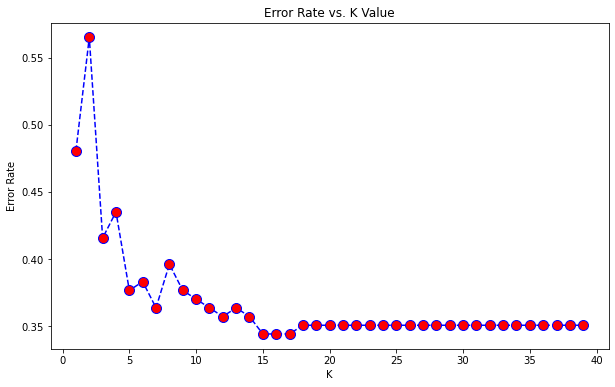

Minimum error:- 0.3441558441558441 at K = 15


In [16]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train, y_train)
 pred_i = knn.predict(x_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [17]:
knn = KNeighborsClassifier(n_neighbors=17, metric='euclidean')
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=17)